# Aggregate extraced time across multiple traces

1. Input parameters: directory with JSON traces, trace name pattern, (multiple) event patterns.  
   a. In trace name pattern include the varying parameter value (MBS).
2. For each event pattern, extract event time from all traces one by one using parseOneTrace script.
3. Aggregate values into one DF along with the varying parameter value extracted from the trace filename.


In [1]:
import os
import pandas as pd
import subprocess
import re
import matplotlib
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))

Pandas: 1.1.0
Matplotlib: 3.2.2


### Functions

In [3]:
# Plot grid on the axis ax
def drawGrid(ax, xstep=10, ystep=None, minor_ticks_x=5., minor_ticks_y=5.):
    # ax.set_xlim(0, None)
    # ax.set_ylim(0, None)
    minorLocatorX = MultipleLocator(xstep / minor_ticks_x)
    majorLocatorX = MultipleLocator(xstep)
    ax.xaxis.set_major_locator(majorLocatorX)
    ax.xaxis.set_minor_locator(minorLocatorX)
    if ystep is not None:
        minorLocatorY = MultipleLocator(ystep / minor_ticks_y)
        majorLocatorY = MultipleLocator(ystep)
        ax.yaxis.set_minor_locator(minorLocatorY)
        ax.yaxis.set_major_locator(majorLocatorY)
    ax.grid(ls=":", lw=.5, alpha=0.8, color="grey")
    ax.grid(which='minor', ls=':', lw=.2, alpha=.8, color='grey')

## Set input parameters

In [4]:
logdir = 'logs/DL.cont/traces/20200806'
trace_name_pattern = 'nsys_trace_([0-9]+).json'
event_patterns = ['.*convolution.*', '.*iteration.*']

## Read trace files

In [5]:
list_command = "ls -1 " + logdir
files = []
param_values = []
proc = subprocess.Popen(list_command.split(" "),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.STDOUT,
                        encoding='utf8')
for line in iter(proc.stdout.readline, ''):
    line = line.strip(" \n")
    m = re.match(trace_name_pattern, line)
    if m:
        files.append(os.path.abspath(os.path.join(logdir, line)))
        param_values.append(m.group(1))

print('{} files in {}'.format(len(files), logdir))
print(tuple(zip(files,param_values)))

20 files in logs/DL.cont/traces/20200806
(('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_10.json', '10'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_100.json', '100'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_110.json', '110'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_12.json', '12'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_120.json', '120'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_130.json', '130'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_15.json', '15'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_20.json', '20'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_30.json', '30'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_40.json', '40'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_5.json', '5'), ('/host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_tra

In [6]:
results = None
# Set to True to parse JSON traces saving results in a CSV
parse_json_traces=True
for param, tracefile in zip(param_values, files):
    events = ' '.join(event_patterns)
    if parse_json_traces:
        # Run
        # python3 parseOneTrace.py -f $tracefile --events $events
        command = 'python3 parseOneTrace.py -f {} --events {}'.format(tracefile, events)
        print(command)
        p = subprocess.run(command.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                           bufsize=0, shell=False)
        if p.returncode == 0:
            if p.stdout:
                print(p.stdout.decode('utf-8'))
            print('Finished OK')
        else:        
            print(p.stdout.decode('utf-8'))
            print('ERROR')
            print(p.stderr.decode('utf-8'))
    # Read data from CSV file
    directory = os.path.dirname(tracefile)
    csvfile = ('').join(os.path.basename(
        tracefile).split('.')[:-1])  # Filename without extension
    csvfile = csvfile + '.csv'
    csvfile = os.path.join(directory, csvfile)
    print('Reading {}'.format(csvfile))    
    df_ = pd.read_csv(csvfile)
    df_['param'] = param
#     display(df_.head())
    if results is None:
        results = df_
    else:
        results = results.append(df_, ignore_index=True)
        
results.sample(n=8)

python3 parseOneTrace.py -f /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_10.json --events .*convolution.* .*iteration.*
Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_10.json
Read 39500 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_10.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
281   59.0            59.0  ...  1.738039  5.462334
2211  34.0            34.0  ...  5.463339       NaN
2212  34.0            34.0  ...  5.463344       NaN
2220  59.0            59.0  ...  5.681602  5.827814
2230  59.0            59.0  ...  5.683555  5.741088

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                             

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_100.json
Read 43148 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_100.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
309   59.0            59.0  ...  1.850226  5.557910
2239  34.0            34.0  ...  5.558920       NaN
2240  34.0            34.0  ...  5.558926       NaN
2248  59.0            59.0  ...  6.359021  7.240498
2259  59.0            59.0  ...  6.384155  6.669575

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
52   String   52.0                       c

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_110.json
Read 43151 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_110.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
309   59.0            59.0  ...  1.815146  5.584120
2239  34.0            34.0  ...  5.585095       NaN
2240  34.0            34.0  ...  5.585102       NaN
2248  59.0            59.0  ...  6.438247  7.384977
2259  59.0            59.0  ...  6.465156  6.748614

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
52   String   52.0                       c

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_12.json
Read 39625 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_12.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
291   59.0            59.0  ...  1.762408  5.429757
2221  34.0            34.0  ...  5.430919       NaN
2222  34.0            34.0  ...  5.430927       NaN
2232  59.0            59.0  ...  5.662739  5.808636
2242  59.0            59.0  ...  5.664692  5.727708

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
51   String   51.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_120.json
Read 43152 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_120.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
307   59.0            59.0  ...  1.849738  5.629563
2237  34.0            34.0  ...  5.630962       NaN
2238  34.0            34.0  ...  5.630988       NaN
2248  59.0            59.0  ...  6.646291  7.650934
2258  59.0            59.0  ...  6.653464  6.959929

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
52   String   52.0                       c

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_130.json
Read 43186 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_130.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
308   59.0            59.0  ...  1.862535  5.576311
2238  34.0            34.0  ...  5.577344       NaN
2239  34.0            34.0  ...  5.577353       NaN
2247  59.0            59.0  ...  6.548625  7.804124
2258  59.0            59.0  ...  6.580487  6.935305

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
42   String   42.0                            cudnnConvolutionForward
51   String   51.0                       c

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_15.json
Read 39696 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_15.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
287   59.0            59.0  ...  1.766462  5.478966
2217  34.0            34.0  ...  5.480066       NaN
2218  34.0            34.0  ...  5.480075       NaN
2226  59.0            59.0  ...  5.748291  5.920084
2236  59.0            59.0  ...  5.750597  5.824407

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
51   String   51.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_20.json
Read 39702 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_20.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
288   59.0            59.0  ...  1.828046  5.482074
2218  34.0            34.0  ...  5.483122       NaN
2219  34.0            34.0  ...  5.483130       NaN
2227  59.0            59.0  ...  5.786590  6.001385
2237  59.0            59.0  ...  5.788974  5.862856

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
51   String   51.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_30.json
Read 40086 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_30.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
291   59.0            59.0  ...  1.821971  5.555322
2221  34.0            34.0  ...  5.556464       NaN
2222  34.0            34.0  ...  5.556477       NaN
2227  59.0            59.0  ...  5.906332  6.220911
2238  59.0            59.0  ...  5.915904  6.025283

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
51   String   51.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_40.json
Read 40091 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_40.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
292   59.0            59.0  ...  1.754610  5.405117
2222  34.0            34.0  ...  5.406086       NaN
2223  34.0            34.0  ...  5.406092       NaN
2231  59.0            59.0  ...  5.822518  6.207673
2242  59.0            59.0  ...  5.836433  5.969213

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
44   String   44.0                            cudnnConvolutionForward
52   String   52.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_5.json
Read 39639 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_5.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
288   59.0            59.0  ...  1.834946  5.537773
2218  34.0            34.0  ...  5.538751       NaN
2219  34.0            34.0  ...  5.538756       NaN
2222  59.0            59.0  ...  5.706488  5.822056
2231  59.0            59.0  ...  5.707362  5.763453

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
48   String   48.0                       cudnn

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_50.json
Read 40050 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_50.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
293   59.0            59.0  ...  1.833826  5.590708
2223  34.0            34.0  ...  5.591944       NaN
2224  34.0            34.0  ...  5.591956       NaN
2234  59.0            59.0  ...  6.070101  6.518421
2244  59.0            59.0  ...  6.074359  6.211000

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
51   String   51.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_6.json
Read 39633 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_6.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
289   59.0            59.0  ...  1.836193  5.544151
2219  34.0            34.0  ...  5.545134       NaN
2220  34.0            34.0  ...  5.545141       NaN
2227  59.0            59.0  ...  5.732216  5.858016
2237  59.0            59.0  ...  5.734544  5.793367

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
48   String   48.0                       cudnn

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_60.json
Read 40058 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_60.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
294   59.0            59.0  ...  1.817275  5.468764
2224  34.0            34.0  ...  5.469807       NaN
2225  34.0            34.0  ...  5.469815       NaN
2235  59.0            59.0  ...  6.051829  6.598000
2245  59.0            59.0  ...  6.056081  6.231701

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
42   String   42.0                            cudnnConvolutionForward
50   String   50.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_7.json
Read 39395 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_7.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
283   59.0            59.0  ...  1.797702  5.459911
2213  34.0            34.0  ...  5.460979       NaN
2214  34.0            34.0  ...  5.460985       NaN
2220  59.0            59.0  ...  5.657515  5.778607
2230  59.0            59.0  ...  5.659203  5.720787

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
43   String   43.0                            cudnnConvolutionForward
48   String   48.0                       cudnn

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_70.json
Read 40161 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_70.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
291   59.0            59.0  ...  1.839716  5.574336
2221  34.0            34.0  ...  5.575413       NaN
2222  34.0            34.0  ...  5.575420       NaN
2232  59.0            59.0  ...  6.217202  6.859996
2242  59.0            59.0  ...  6.222012  6.427992

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
42   String   42.0                            cudnnConvolutionForward
50   String   50.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_8.json
Read 39400 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_8.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
286   59.0            59.0  ...  1.743413  5.443223
2216  34.0            34.0  ...  5.444307       NaN
2217  34.0            34.0  ...  5.444312       NaN
2224  59.0            59.0  ...  5.642439  5.767922
2234  59.0            59.0  ...  5.644452  5.703778

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
45   String   45.0                            cudnnConvolutionForward
50   String   50.0                       cudnn

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_80.json
Read 40159 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_80.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
292   59.0            59.0  ...  1.830915  5.491055
2222  34.0            34.0  ...  5.492091       NaN
2223  34.0            34.0  ...  5.492099       NaN
2233  59.0            59.0  ...  6.210866  6.913186
2243  59.0            59.0  ...  6.216288  6.423940

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
44   String   44.0                            cudnnConvolutionForward
52   String   52.0                       cud

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_9.json
Read 39408 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_9.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
290   59.0            59.0  ...  1.807694  5.517170
2220  34.0            34.0  ...  5.518495       NaN
2221  34.0            34.0  ...  5.518525       NaN
2226  59.0            59.0  ...  5.716509  5.863048
2236  59.0            59.0  ...  5.718330  5.790073

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
49   String   49.0                            cudnnConvolutionForward
54   String   54.0                       cudnn

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_90.json
Read 40157 rows from /host/nsystraceparser/logs/DL.cont/traces/20200806/nsys_trace_90.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
291   59.0            59.0  ...  1.822226  5.541141
2221  34.0            34.0  ...  5.542224       NaN
2222  34.0            34.0  ...  5.542233       NaN
2230  59.0            59.0  ...  6.261517  7.069543
2241  59.0            59.0  ...  6.286626  6.519611

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
44   String   44.0                            cudnnConvolutionForward
52   String   52.0                       cud

name                   NVTX  duration  \
29098  cudnnConvolutionBackwardFilter   Iteration 2,BWD pass  0.000091   
48136         cudnnConvolutionForward   Iteration 2,FWD pass  0.000039   
19682    cudnnConvolutionBackwardData   Iteration 2,BWD pass  0.000050   
39779         cudnnConvolutionForward   Iteration 6,FWD pass  0.000214   
22756    cudnnConvolutionBackwardData   Iteration 2,BWD pass  0.000071   
15816  cudnnConvolutionBackwardFilter  Iteration 10,BWD pass  0.000070   
15846    cudnnConvolutionBackwardData  Iteration 10,BWD pass  0.000048   
22051    cudnnConvolutionBackwardData  Iteration 10,BWD pass  0.000324   

       GPU side param  
29098     False    40  
48136     False    70  
19682     False    15  
39779      True     6  
22756     False    20  
15816     False   120  
15846     False   120  
22051      True    15

In [8]:
def extractIteration(s):
    s = s.replace('Iteration','')
    try:
        x = int(s)
    except:
        print('Cannot convert to int {}.'.format(s))
        return None
    return x

In [9]:
# Time of CPU-side NVTX iterations per MBS
df_ = results.copy()
df_ = df_[df_['name'].str.lower().str.contains('iteration')]
df_['iteration'] = df_['name'].apply(extractIteration)
df_['param'] = df_['param'].astype(int)
df_.rename({'param':'mini-batch size'},axis=1,inplace=True)
df_ = df_[df_['iteration'] != 4]
df_cpu = df_[df_['GPU side']==False].copy()
df_gpu = df_[df_['GPU side']==True].copy()
display(df_gpu.head())
df_cpu = df_cpu.pivot_table(index='mini-batch size', columns = 'iteration', values = 'duration')
df_cpu.sort_index(inplace=True)
df_gpu = df_gpu.pivot_table(index='mini-batch size', columns = 'iteration', values = 'duration')
df_gpu.sort_index(inplace=True)
df_gpu.tail()

name NVTX  duration  GPU side  mini-batch size  iteration
3161  Iteration 1  NaN  0.139970      True               10          1
3163  Iteration 2  NaN  0.116866      True               10          2
3165  Iteration 3  NaN  0.106288      True               10          3
3169  Iteration 5  NaN  0.100051      True               10          5
3171  Iteration 6  NaN  0.100486      True               10          6

iteration              1         2         3         5         6         7   \
mini-batch size                                                               
90               0.776759  0.780069  0.760705  0.745816  0.743452  0.743312   
100              0.849400  0.833977  0.799231  0.793047  0.793295  0.790374   
110              0.913284  0.910298  0.889567  0.871837  0.870556  0.868346   
120              0.993393  0.999108  0.963533  0.951336  0.945750  0.944600   
130              1.216539  1.084160  1.050095  1.032050  1.032936  1.031816   

iteration              8         9         10        11  
mini-batch size                                          
90               0.745958  0.749366  0.745020  0.000384  
100              0.796314  0.791395  0.790378  0.000328  
110              0.869955  0.868084  0.866612  0.000339  
120              0.947353  0.942160  0.944653  0.000362  
130              1.031394  1.030848  1.031305  0.000205

Text(0.5, 1.0, 'GPU iteration times per MBS')

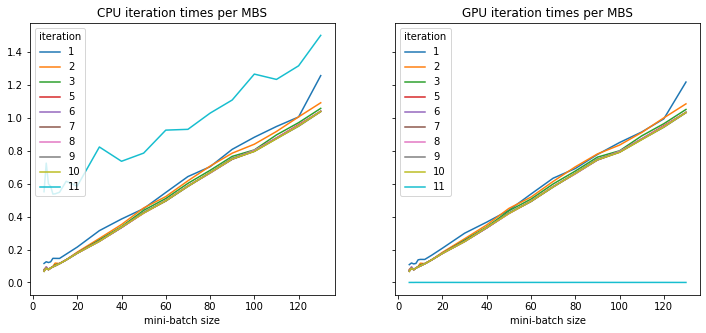

In [11]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)
ax = axs[0]
df_cpu.plot(ax=ax)
ax.set_title('CPU iteration times per MBS')
ax = axs[1]
df_gpu.plot(ax=ax)
ax.set_title('GPU iteration times per MBS')

In [17]:
# Return iteration number from NVTX field
def extractIterations(row):
    s = row['NVTX']
    if type(s)==float and math.isnan(s):
        s = row['name']
    m = re.search('\d+',s)
    if m is not None:        
        try:
            x = int(m[0])
        except:
            print('Cannot convert to int {}.'.format(s))
            return None
        return x
    else:
        print('Cannot convert to int {}. ({})'.format(s, m))
    return None
        

In [72]:
# Time of iterations (use CPU-side 2 and 3), CPU-side FWD/BWD pass, loss and prediction and optimizer updates
df_ = results.copy()
df_['iter'] = df_.apply(extractIterations,axis=1)
df_['param'] = df_['param'].astype(int)
df_.rename({'param':'mini-batch size'},axis=1,inplace=True)

# To find time of convolutional layer filter data by iteration number and by name
iterations = [2,3,4,5,6,7,8,9,10]
df_ = df_[df_['iter'].isin(iterations)]
df_ = df_[~df_['name'].str.lower().str.contains('iteration')]

df_gpu = df_[df_['GPU side'] == True]
df_cpu = df_[df_['GPU side'] == False]

df_cpu.sample(n=7)

name                   NVTX  duration  \
32820         cudnnConvolutionForward   Iteration 4,FWD pass  0.000033   
5122          cudnnConvolutionForward   Iteration 7,FWD pass  0.000071   
63034         cudnnConvolutionForward   Iteration 9,FWD pass  0.000052   
43918         cudnnConvolutionForward   Iteration 9,FWD pass  0.000034   
16618         cudnnConvolutionForward   Iteration 3,FWD pass  0.000124   
12602  cudnnConvolutionBackwardFilter  Iteration 10,BWD pass  0.000061   
44400    cudnnConvolutionBackwardData  Iteration 10,BWD pass  0.000047   

       GPU side  mini-batch size  iter  
32820     False                5     4  
5122      False              100     7  
63034     False               90     9  
43918     False               60     9  
16618     False              130     3  
12602     False               12    10  
44400     False               60    10

In [73]:
def aggregateAndPivot(df):
    df_ = df.copy()
    df_ = df_.pivot_table(index='mini-batch size', columns = 'name', values = 'duration', aggfunc=np.sum)
    df_['convolution'] = df_.sum(axis=1)
    df_['convolution'] = df_['convolution'] / len(iterations) # mean time per iteration
    df_.sort_index(inplace=True)
    return df_

# Aggregate convolutional data by mini-batch size
df_cpu = aggregateAndPivot(df_cpu)
df_gpu = aggregateAndPivot(df_gpu)
df_cpu = df_cpu[['convolution']]
df_gpu = df_gpu[['convolution']]
display(df_cpu.head())
display(df_gpu.head())

name             convolution
mini-batch size             
5                   0.008725
6                   0.010260
7                   0.008322
8                   0.008388
9                   0.008685

name             convolution
mini-batch size             
5                   0.043804
6                   0.047207
7                   0.048913
8                   0.056075
9                   0.059714

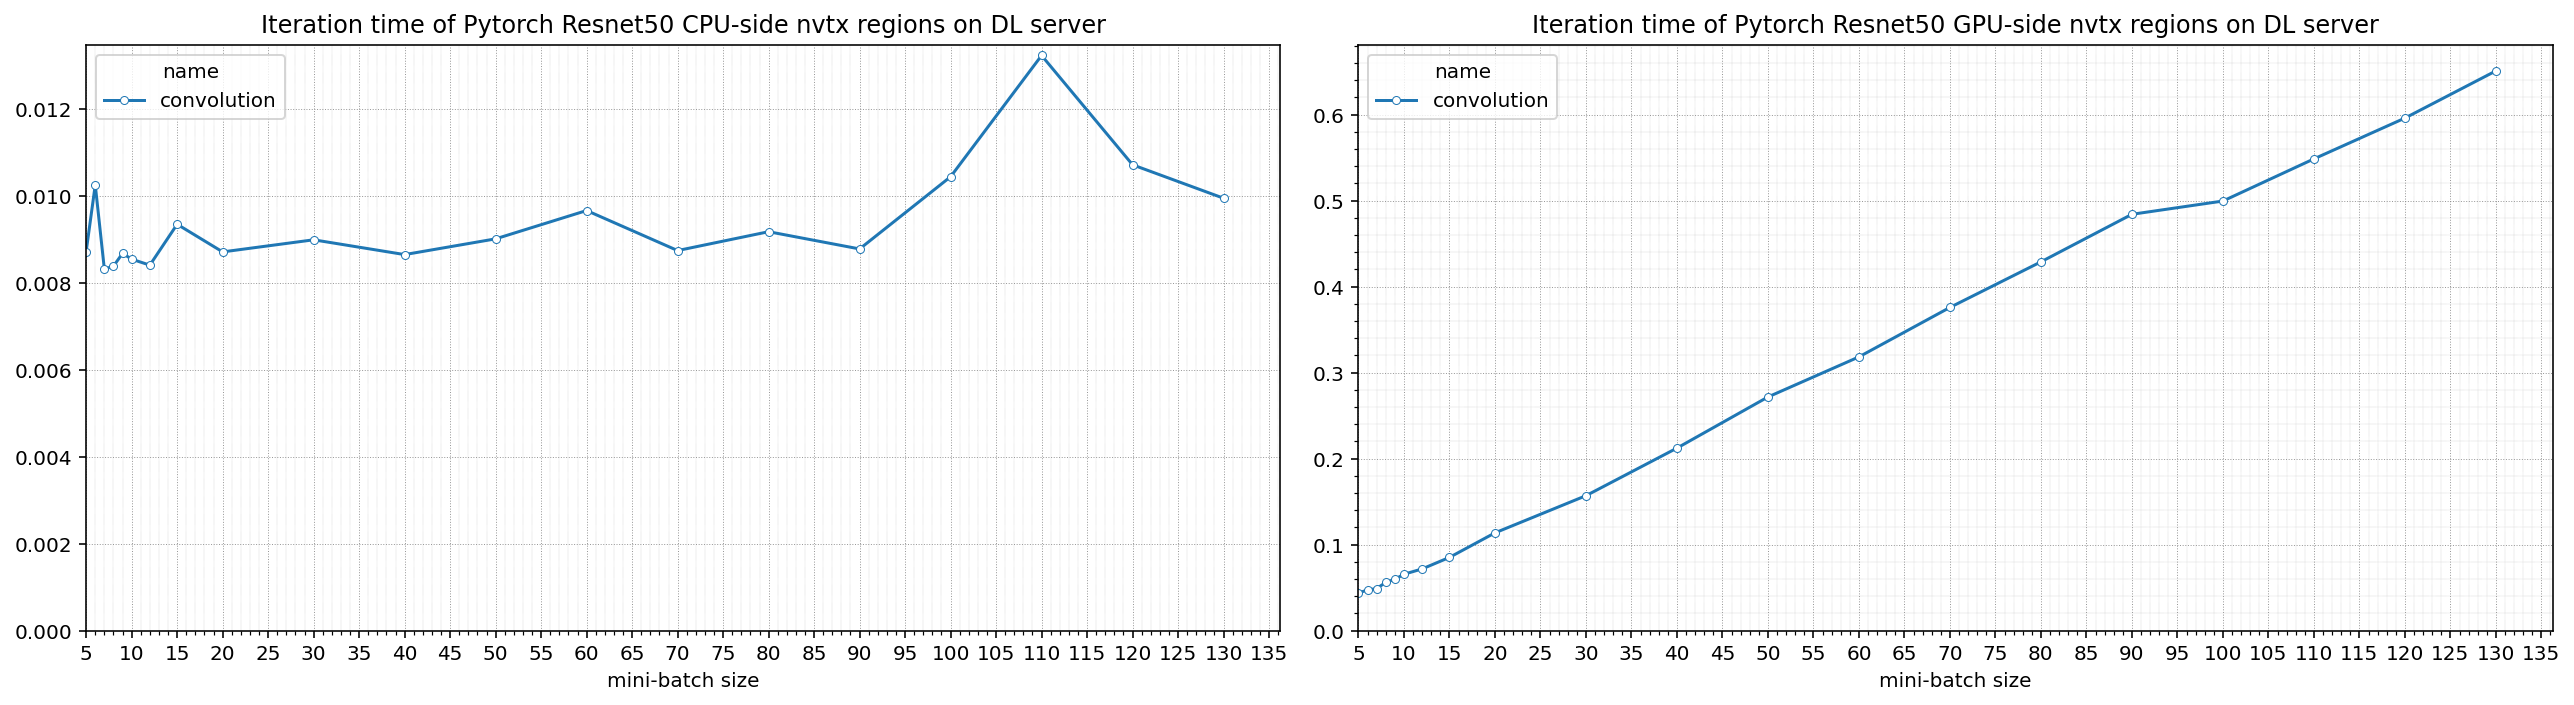

In [77]:
fig,axs = plt.subplots(1,2,figsize=(18,5),dpi=144,sharey=False)
plt.minorticks_on()
ax = axs[0]
df_cpu.plot(marker='o',ms=4,mfc='w',mew=0.5,ax=ax)
ax.set_title('Iteration time of Pytorch Resnet50 CPU-side nvtx regions on DL server')
drawGrid(ax,xstep=5)
ax.set_xlim(5,None)
ax.set_ylim(0,None)
ax = axs[1]
df_gpu.plot(marker='o',ms=4,mfc='w',mew=0.5,ax=ax)
ax.set_title('Iteration time of Pytorch Resnet50 GPU-side nvtx regions on DL server')
drawGrid(ax,xstep=5)
ax.set_xlim(5,None)
ax.set_ylim(0,None)
plt.tight_layout()

## Compare with DNNMark time

In [87]:
# mlbenchmarks/DNNMark/logs/DL.cont/dnnmark_resnet50_ConvSeries_20200806/
csvfile = '/host/mlbenchmarks/DNNMark/logs/DL.cont/dnnmark_resnet50_ConvSeries_20200806/CNN_time_DL.cont.csv'
dnnmark = pd.read_csv(csvfile)
dnnmark['DNNMark'] = dnnmark['CNN time']/10.
print(dnnmark.dtypes)
dnnmark.head()

config       object
machine      object
batch         int64
CNN time    float64
DNNMark     float64
dtype: object


config  machine  batch  CNN time   DNNMark
0  convaloneconfig  DL.cont      5  0.665543  0.066554
1  convaloneconfig  DL.cont      6  0.734279  0.073428
2  convaloneconfig  DL.cont      7  0.863825  0.086382
3  convaloneconfig  DL.cont      8  0.969393  0.096939
4  convaloneconfig  DL.cont      9  1.040327  0.104033

Text(0.5, 1.0, 'Pytorch resnet50 iteration time comapred to DNNMark')

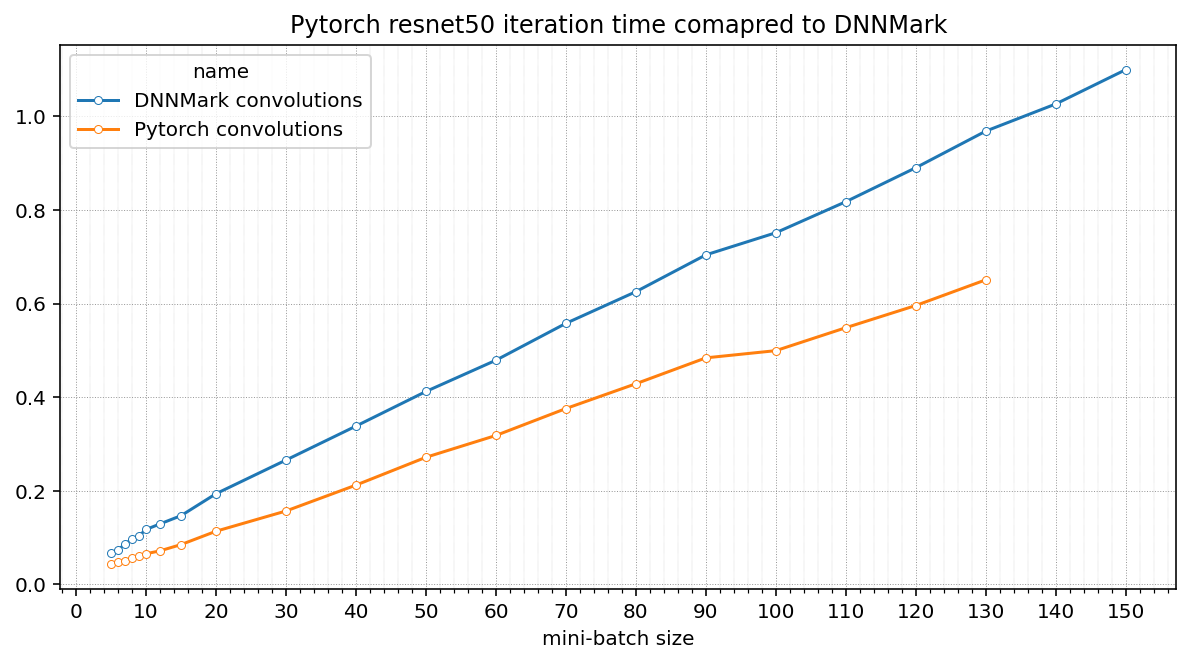

In [89]:
fig,ax = plt.subplots(figsize=(10,5),dpi=144)
dnnmark.rename({'DNNMark':'DNNMark convolutions'},axis=1).plot('batch','DNNMark convolutions',marker='o',ms=4, mfc='w', mew=0.5, ax=ax)
df_gpu.rename({'convolution':'Pytorch convolutions'},axis=1).plot(marker='o',ms=4,mfc='w',mew=0.5,ax=ax)
drawGrid(ax)
ax.set_title("Pytorch resnet50 iteration time comapred to DNNMark")

In [93]:
# Join tables
df = df_gpu.reset_index().rename({'mini-batch size':'batch'},axis=1)
df = df.merge(dnnmark[['batch','DNNMark']], on=['batch'], how='inner')
df['koeff'] = df['DNNMark'] / df['convolution']
df.head()

batch  convolution   DNNMark     koeff
0      5     0.043804  0.066554  1.519383
1      6     0.047207  0.073428  1.555430
2      7     0.048913  0.086382  1.766057
3      8     0.056075  0.096939  1.728734
4      9     0.059714  0.104033  1.742188

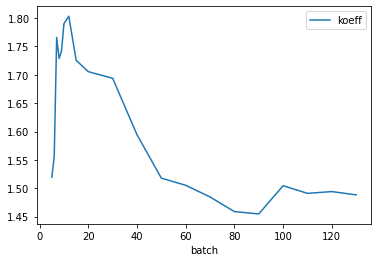

In [94]:
df.plot('batch','koeff')